# Linear Regression in Action 

To predict a best fit line through the data points that minimises the errors between  predicted and actual values of target variables

#### Import Required libraries

In [1]:
import pandas as pd
import numpy as np
#for plotting and visualization
import  matplotlib.pyplot as plt
%matplotlib inline

#### Load and read the dataset

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
#check the number of rows and columns of dataset
df.shape

(30, 2)

we have 30 rows and 2 columns in our Salary dataset

In [4]:
#view top few rows of dataset
df.head(3)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [5]:
#check for any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


we don't have any missing values in our dataset

#### Visualise the data and relationship between variables

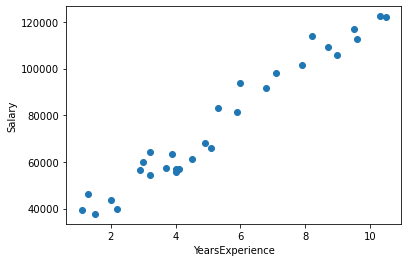

In [7]:
#use matplotlib to plot scatter plot between salary and work experience
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

The graph clearly shows a positive correlation between work exp and salary .

In [8]:
#Correlation strength 
np.corrcoef(df['YearsExperience'],df['Salary'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

array([[<AxesSubplot:title={'center':'YearsExperience'}>]], dtype=object)

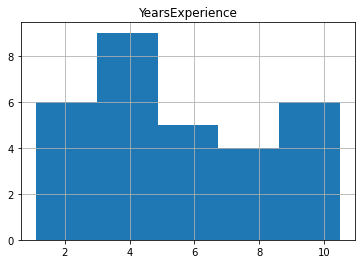

In [9]:
df.hist('YearsExperience',bins=5)

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

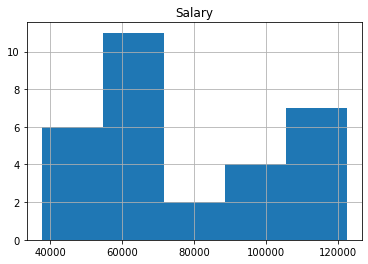

In [10]:
df.hist('Salary',bins=5)

So , we have 0.97 coefficient of correlation between work exp and Salary 

In case , if did not have any other variable apart from Salary , the best estimate of next prediction of Salary would be the mean value of Salary

In [11]:
np.mean(df.Salary)

76003.0

#### Feature Engineering

In [12]:
#create the input and output variables
#X =input variable that contains work exp
X=df[['YearsExperience']]
#y=output/target variable that contains salary
y=df[['Salary']]

In [13]:
#import the Linear Regression model from sklearn 
from sklearn.linear_model import LinearRegression

In [14]:
#build and train the Linear Regression model on our input and output data (X,y)
lr=LinearRegression().fit(X,y)

In [15]:
#Accuracy of our LR model 
lr.score(X,y)

0.9569566641435086

So, our linear regression model has 95% accuracy in terms of predicting salary values

### Predictions

* y = what you want to predict ( Salary )
* x = input value ( years of exp)
* y=mx+c
* y=B0+B1*X1
* salary=intercept + coef*(yearsofexp)

In [16]:
#slope of regression line 
lr.coef_[0]

array([9449.96232146])

In [17]:
# B1 = 9449.96

In [18]:
#intercept of regression line
lr.intercept_

array([25792.20019867])

In [19]:
# B0= 25792.2001

## Predict function in Regression 

In [20]:
#create a new column which captures predicted values from LR model 
df['predicted_salary']=lr.predict(X)

In [21]:
df.head(3)

,YearsExperience,Salary,predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681


In [22]:
# Predict function ( B0 + B1*X1)

In [23]:
def predict_func(exp):
    intercept=lr.intercept_[0]
    ceof=lr.coef_[0]
    prediction=intercept+(exp*ceof)
    return prediction[0]

In [24]:
pred=predict_func(1.3)
print(pred)

38077.151216560305


## Accuracy 

* TSS = summation of difference( actual sal & mean salary)
* SSE = summation of difference( actual sal & predicted salary)
* SSR = summation of difference(predicted salary & mean salary )

* r2= SSR/TSS

### Residuals (Errors)

In [25]:
#create an additional column to dataset which captures difference amount between actual and predicted salary values
df['residuals']=df['Salary']-df['predicted_salary']

In [26]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681


### Squared residuals 

we have to square the residuals to make the errors positive  

In [27]:
#create an additional column that squares the residuals amount
df['sq_residuals']=df['residuals']**2
    

In [28]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06


## Total sum of squared errors

In [29]:
#create a column which has mean value of salary 
df['mean_salary']=76003.0

In [30]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals,mean_salary
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,76003.0
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,76003.0
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,76003.0


In [31]:
#create a column with difference between salary value and mean salary value
df['errors']=df['Salary']-df['mean_salary']

In [32]:
#create the squared column of errors
df['sq_errors']=df['errors']**2

In [33]:
df.head(3)

,YearsExperience,Salary,predicted_salary,residuals,sq_residuals,mean_salary,errors,sq_errors
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06,76003.0,-36660.0,1.343956e+09
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07,76003.0,-29798.0,8.879208e+08
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06,76003.0,-38272.0,1.464746e+09


In [34]:
SST = np.sum(df['sq_errors'])

In [35]:
print(SST)

21794977852.0


In [36]:
SSE=np.sum(df['sq_residuals'])
print(SSE)

938128551.668429


### R- Square ( Coefficient of Determination )

SST = SSE + SSR

In [38]:
#The variation explained due to Linear regression model 
SSR=SST-SSE

In [39]:
#ceofficient of determination (SSR/SST)
r_sq=SSR/SST

In [40]:
r_sq

0.9569566641435084

This is the same value which lr.score gave initially while training the model

## Multicollinearity 

Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant.

Multicollinearity increases the standard errors of the coefficients. Increased standard errors in turn means that coefficients for some independent variables may be found not to be significantly different from 0. In other words, by overinflating the standard errors, multicollinearity makes some variables statistically insignificant when they should be significant

* A regression coefficient is not significant even though, theoretically, that variable should be highly correlated with Y.
* When you add or delete an X variable, the regression coefficients change dramatically.
* You see a negative regression coefficient when your response should increase along with X.
* You see a positive regression coefficient when the response should decrease as X increases.